<a href="https://colab.research.google.com/github/garg8348/Rainfall_Prediction_Using_ANN/blob/master/rainfall.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import os
%tensorflow_version 2.x
import tensorflow as tf

In [0]:
print(tf.__version__)

2.0.0


In [0]:
import pandas as pd

In [0]:
mpl.rcParams['figure.figsize']=(8,6)
mpl.rcParams['axes.grid']= False

In [0]:
data = pd.read_csv('rainfall in india 1901-2015.csv')

In [0]:
data.head()

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
0,ANDAMAN & NICOBAR ISLANDS,1901,49.2,87.1,29.2,2.3,528.8,517.5,365.1,481.1,332.6,388.5,558.2,33.6,3373.2,136.3,560.3,1696.3,980.3
1,ANDAMAN & NICOBAR ISLANDS,1902,0.0,159.8,12.2,0.0,446.1,537.1,228.9,753.7,666.2,197.2,359.0,160.5,3520.7,159.8,458.3,2185.9,716.7
2,ANDAMAN & NICOBAR ISLANDS,1903,12.7,144.0,0.0,1.0,235.1,479.9,728.4,326.7,339.0,181.2,284.4,225.0,2957.4,156.7,236.1,1874.0,690.6
3,ANDAMAN & NICOBAR ISLANDS,1904,9.4,14.7,0.0,202.4,304.5,495.1,502.0,160.1,820.4,222.2,308.7,40.1,3079.6,24.1,506.9,1977.6,571.0
4,ANDAMAN & NICOBAR ISLANDS,1905,1.3,0.0,3.3,26.9,279.5,628.7,368.7,330.5,297.0,260.7,25.4,344.7,2566.7,1.3,309.7,1624.9,630.8


In [0]:
data.tail()

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
4111,LAKSHADWEEP,2011,5.1,2.8,3.1,85.9,107.2,153.6,350.2,254.0,255.2,117.4,184.3,14.9,1533.7,7.9,196.2,1013.0,316.6
4112,LAKSHADWEEP,2012,19.2,0.1,1.6,76.8,21.2,327.0,231.5,381.2,179.8,145.9,12.4,8.8,1405.5,19.3,99.6,1119.5,167.1
4113,LAKSHADWEEP,2013,26.2,34.4,37.5,5.3,88.3,426.2,296.4,154.4,180.0,72.8,78.1,26.7,1426.3,60.6,131.1,1057.0,177.6
4114,LAKSHADWEEP,2014,53.2,16.1,4.4,14.9,57.4,244.1,116.1,466.1,132.2,169.2,59.0,62.3,1395.0,69.3,76.7,958.5,290.5
4115,LAKSHADWEEP,2015,2.2,0.5,3.7,87.1,133.1,296.6,257.5,146.4,160.4,165.4,231.0,159.0,1642.9,2.7,223.9,860.9,555.4


In [0]:
data['YEAR'].max()

2015

In [0]:
data.dtypes

SUBDIVISION     object
YEAR             int64
JAN            float64
FEB            float64
MAR            float64
APR            float64
MAY            float64
JUN            float64
JUL            float64
AUG            float64
SEP            float64
OCT            float64
NOV            float64
DEC            float64
ANNUAL         float64
Jan-Feb        float64
Mar-May        float64
Jun-Sep        float64
Oct-Dec        float64
dtype: object

In [0]:
groups =data.groupby('SUBDIVISION')['YEAR','JAN','FEB','MAR','APR','MAY','JUN','JUL','AUG','SEP','OCT','NOV','DEC']
data=groups.get_group('JHARKHAND')
data.head()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
782,1901,92.7,66.6,11.1,18.4,33.5,70.9,269.4,415.1,248.0,37.3,11.5,0.0
783,1902,4.2,7.7,13.2,28.5,59.8,89.9,456.1,204.9,306.6,17.6,5.9,3.2
784,1903,25.1,19.5,10.7,32.8,56.4,142.1,206.1,280.8,190.2,210.1,0.5,0.0
785,1904,2.5,17.0,38.1,9.1,116.1,308.9,494.1,336.1,125.6,30.6,2.3,0.4
786,1905,38.4,53.3,61.6,32.9,66.2,41.5,420.3,293.7,322.8,21.3,0.0,2.7


In [0]:
data=data.melt(['YEAR']).reset_index()
data.head()


,index,YEAR,variable,value
0,0,1901,JAN,92.7
1,1,1902,JAN,4.2
2,2,1903,JAN,25.1
3,3,1904,JAN,2.5
4,4,1905,JAN,38.4


In [0]:
data.tail()

,index,YEAR,variable,value
1375,1375,2011,DEC,0.1
1376,1376,2012,DEC,7.6
1377,1377,2013,DEC,0.0
1378,1378,2014,DEC,1.2
1379,1379,2015,DEC,2.7


In [0]:
data.rename(columns={'variable':'month'},inplace=True)

In [0]:
df=data[['YEAR','month','value']].reset_index().sort_values(by=['YEAR','index'])
df.head()

,index,YEAR,month,value
0,0,1901,JAN,92.7
115,115,1901,FEB,66.6
230,230,1901,MAR,11.1
345,345,1901,APR,18.4
460,460,1901,MAY,33.5


In [0]:
df.columns=['INDEX','YEAR','Month','avg_rainfall']


In [0]:
d={'JAN':1,'FEB':2,'MAR' :3,'APR':4,'MAY':5,'JUN':6,'JUL':7,'AUG':8,'SEP':9,
   'OCT':10,'NOV':11,'DEC':12}
df['Month']=df['Month'].map(d)
df.head()

,INDEX,YEAR,Month,avg_rainfall
0,0,1901,1,92.7
115,115,1901,2,66.6
230,230,1901,3,11.1
345,345,1901,4,18.4
460,460,1901,5,33.5


In [0]:
df['date']=pd.to_datetime(df.assign(day=1).loc[:,['YEAR','Month','day']])
df.head()


,INDEX,YEAR,Month,avg_rainfall,date
0,0,1901,1,92.7,1901-01-01
115,115,1901,2,66.6,1901-02-01
230,230,1901,3,11.1,1901-03-01
345,345,1901,4,18.4,1901-04-01
460,460,1901,5,33.5,1901-05-01


In [0]:
df['avg_rainfall'].max()

660.2

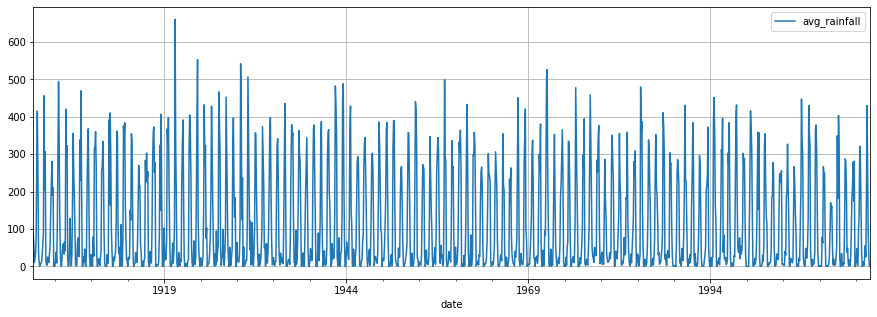

In [0]:
df.set_index('date').plot(y='avg_rainfall',figsize=(15,5),grid=True)

In [0]:
algo_data=df['avg_rainfall']
algo_data.index=df['date']
algo_data.head()
algo_data.shape

(1380,)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fd0c059c978>],
      dtype=object)

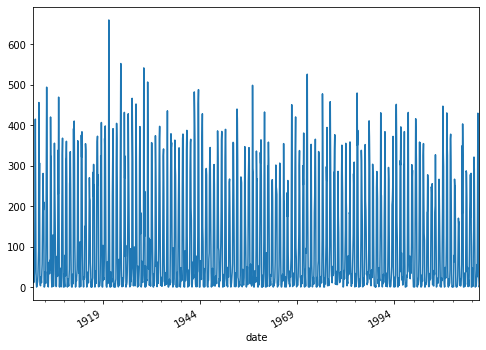

In [0]:
algo_data.plot(subplots=True)

In [0]:
unidata=algo_data.values
print(unidata)

[92.7 66.6 11.1 ... 22.7  0.2  2.7]


In [0]:
TRAIN_SPLIT=1000

In [0]:
uni_train_mean=unidata[:TRAIN_SPLIT].mean()
uni_train_std=unidata[:TRAIN_SPLIT].std()

In [0]:
#unidata=(unidata-uni_train_mean)/uni_train_std

In [0]:
def univariate_data(dataset, start_index, end_index, history_size, target_size):
  data = []
  labels = []

  start_index = start_index + history_size
  if end_index is None:
    end_index = len(dataset) - target_size

  for i in range(start_index, end_index):
    indices = range(i-history_size, i)
    # Reshape data from (history_size,) to (history_size, 1)
    data.append(np.reshape(dataset[indices], (history_size, 1)))
    labels.append(dataset[i+target_size])
  return np.array(data), np.array(labels)

In [0]:
tf.random.set_seed(13)

In [0]:
univariate_past_history=20
univariate_future_target=0

In [0]:
x_train_uni, y_train_uni=univariate_data(unidata,0,TRAIN_SPLIT,univariate_past_history,univariate_future_target)
x_val_uni, y_val_uni=univariate_data(unidata,TRAIN_SPLIT,None, univariate_past_history,univariate_future_target)

In [0]:
print ('Single window of past history')
print (x_train_uni[0])
print ('\n Target rainfall to predict')
print (y_train_uni[0])

Single window of past history
[[ 92.7]
 [ 66.6]
 [ 11.1]
 [ 18.4]
 [ 33.5]
 [ 70.9]
 [269.4]
 [415.1]
 [248. ]
 [ 37.3]
 [ 11.5]
 [  0. ]
 [  4.2]
 [  7.7]
 [ 13.2]
 [ 28.5]
 [ 59.8]
 [ 89.9]
 [456.1]
 [204.9]]

 Target rainfall to predict
306.6


In [0]:
def create_time_steps(length):
  time_steps = []
  for i in range(-length, 0, 1):
    time_steps.append(i)
  return time_steps

In [0]:
def show_plot(plot_data, delta, title):
  labels = ['History', 'True Future', 'Model Prediction']
  marker = ['.-', 'rx', 'go']
  time_steps = create_time_steps(plot_data[0].shape[0])
  if delta:
    future = delta
  else:
    future = 0

  plt.title(title)
  for i, x in enumerate(plot_data):
    if i:
      plt.plot(future, plot_data[i], marker[i], markersize=10,
               label=labels[i])
    else:
      plt.plot(time_steps, plot_data[i].flatten(), marker[i], label=labels[i])
  plt.legend()
  plt.xlim([time_steps[0], (future+5)*2])
  plt.xlabel('Time-Step')
  return plt

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

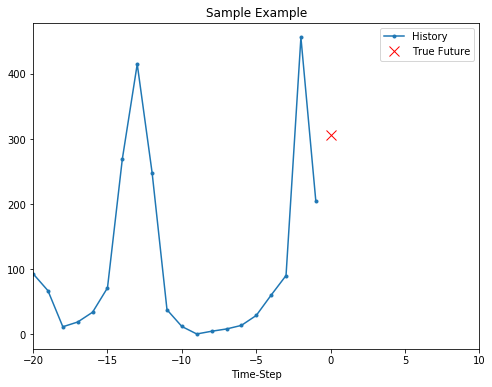

In [0]:
show_plot([x_train_uni[0], y_train_uni[0]], 0, 'Sample Example')

In [0]:
def baseline(history):
  return np.mean(history)

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

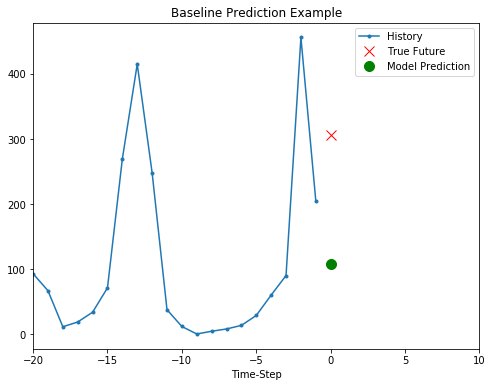

In [0]:
show_plot([x_train_uni[0], y_train_uni[0], baseline(x_train_uni[0])], 0,
           'Baseline Prediction Example')

In [0]:
BATCH_SIZE = 256
BUFFER_SIZE = 10000

train_univariate = tf.data.Dataset.from_tensor_slices((x_train_uni, y_train_uni))
train_univariate = train_univariate.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()

val_univariate = tf.data.Dataset.from_tensor_slices((x_val_uni, y_val_uni))
val_univariate = val_univariate.batch(BATCH_SIZE).repeat()

In [0]:
simple_lstm_model = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(8, input_shape=x_train_uni.shape[-2:]),
    tf.keras.layers.Dense(1)
])

simple_lstm_model.compile(optimizer='adam', loss='mae')

In [0]:
for x, y in val_univariate.take(1):
    print(simple_lstm_model.predict(x).shape)

(256, 1)


In [0]:
EVALUATION_INTERVAL = 200
EPOCHS = 10

simple_lstm_model.fit(train_univariate, epochs=EPOCHS,
                      steps_per_epoch=EVALUATION_INTERVAL,
                      validation_data=val_univariate, validation_steps=50)

Train for 200 steps, validate for 50 steps
Epoch 1/10
200/200 [==============================] - 4s 18ms/step - loss: 109.9003 - val_loss: 99.5966
Epoch 2/10
200/200 [==============================] - 1s 7ms/step - loss: 107.6877 - val_loss: 97.7386
Epoch 3/10
200/200 [==============================] - 1s 7ms/step - loss: 106.1745 - val_loss: 96.9180
Epoch 4/10
200/200 [==============================] - 1s 7ms/step - loss: 105.1673 - val_loss: 96.2487
Epoch 5/10
200/200 [==============================] - 1s 7ms/step - loss: 104.4249 - val_loss: 95.6911
Epoch 6/10
200/200 [==============================] - 1s 7ms/step - loss: 103.7192 - val_loss: 95.1996
Epoch 7/10
200/200 [==============================] - 1s 6ms/step - loss: 103.1192 - val_loss: 94.7297
Epoch 8/10
200/200 [==============================] - 1s 7ms/step - loss: 102.4789 - val_loss: 94.1870
Epoch 9/10
200/200 [==============================] - 1s 6ms/step - loss: 101.8623 - val_loss: 93.5382
Epoch 10/10
200/200 [========

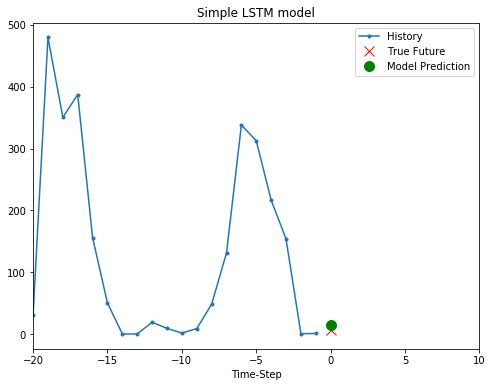

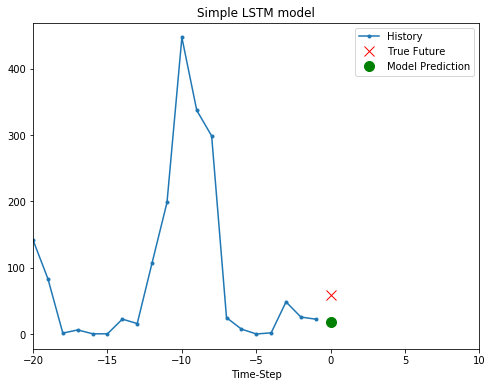

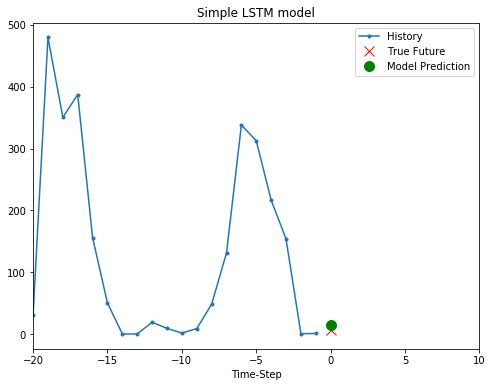

In [0]:
for x, y in val_univariate.take(3):
  plot = show_plot([x[0].numpy(), y[0].numpy(),
                    simple_lstm_model.predict(x)[0]], 0, 'Simple LSTM model')
  plot.show()